In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Based on the training data concerning Titanic passengers, I am creating a model to predict which of the passengers (from the test data file) survived the disaster.**

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [99]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [100]:
train_data.shape

(891, 12)

In [101]:
train_data.duplicated().sum()

0

In [102]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* SibSp - Number of Siblings/Spouses Aboard [1, 0, 3, 4, 2, 5, 8]
* Parch - Number of Parents/Children Aboard [0, 1, 2, 5, 3, 4, 6]
* Fare - Passenger Fare (British pound)
* Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton, nan)

In [104]:
#train_data['Age'].unique()

In [105]:
train_data.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Text(0.5, 1.0, 'Survival based on Sex')

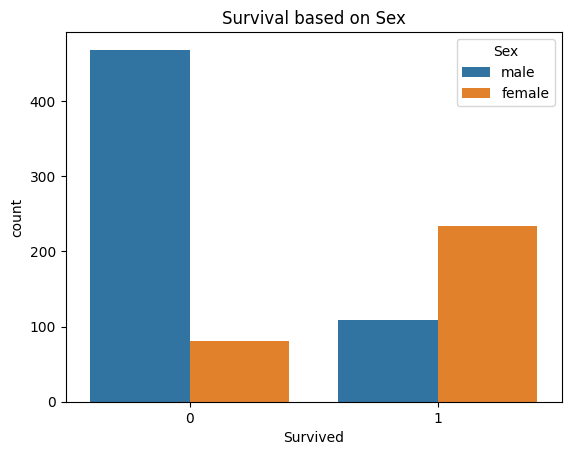

In [106]:
sns.countplot(data=train_data, x='Survived', hue='Sex')
plt.title('Survival based on Sex')

Text(0.5, 1.0, 'Survival based on Pclass')

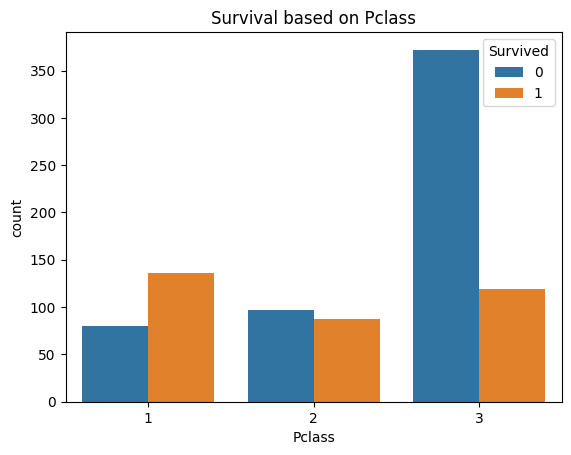

In [107]:
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.title('Survival based on Pclass')

Text(0.5, 1.0, 'Survival based on Number of Parents/Children Aboard')

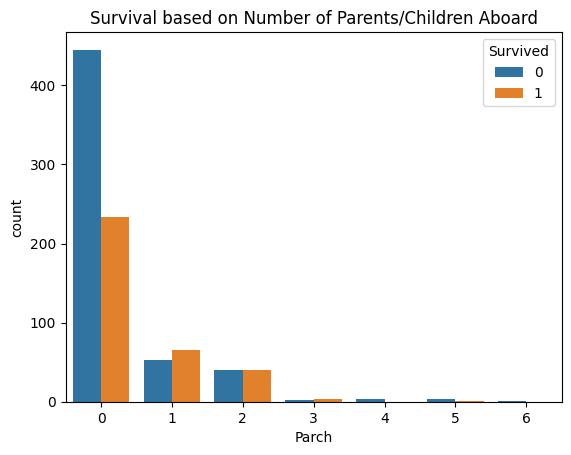

In [108]:
sns.countplot(x='Parch', data=train_data, hue='Survived')
plt.title('Survival based on Number of Parents/Children Aboard')

Text(0.5, 1.0, 'Survival based on Siblings/Spouses Aboard')

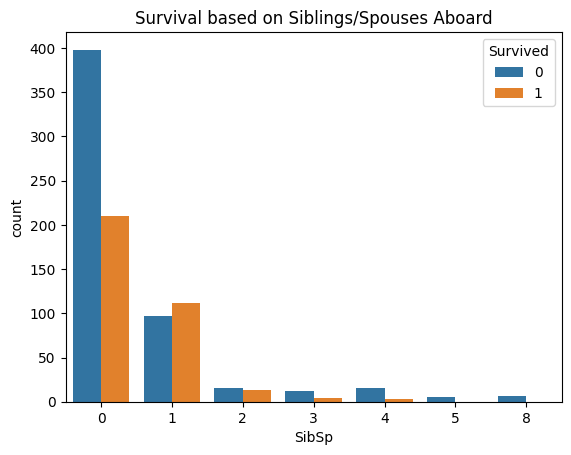

In [109]:
sns.countplot(x='SibSp', data=train_data, hue='Survived')
plt.title('Survival based on Siblings/Spouses Aboard')

Text(0.5, 1.0, 'Survival based on Port of Embarkation')

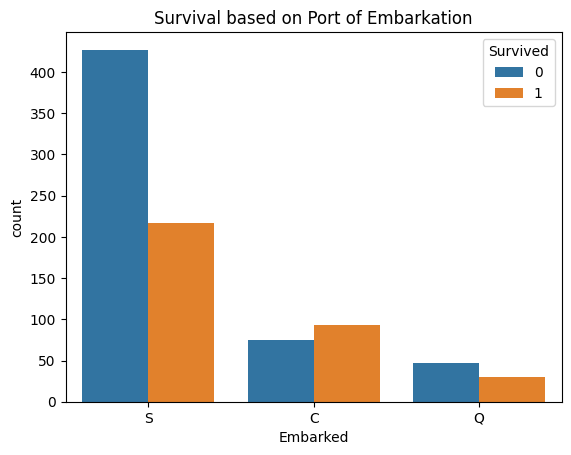

In [110]:
sns.countplot(data=train_data, x='Embarked', hue='Survived')
plt.title('Survival based on Port of Embarkation')

In [111]:
train_data = train_data.dropna(subset=['Age'])
train_data.shape

(714, 12)

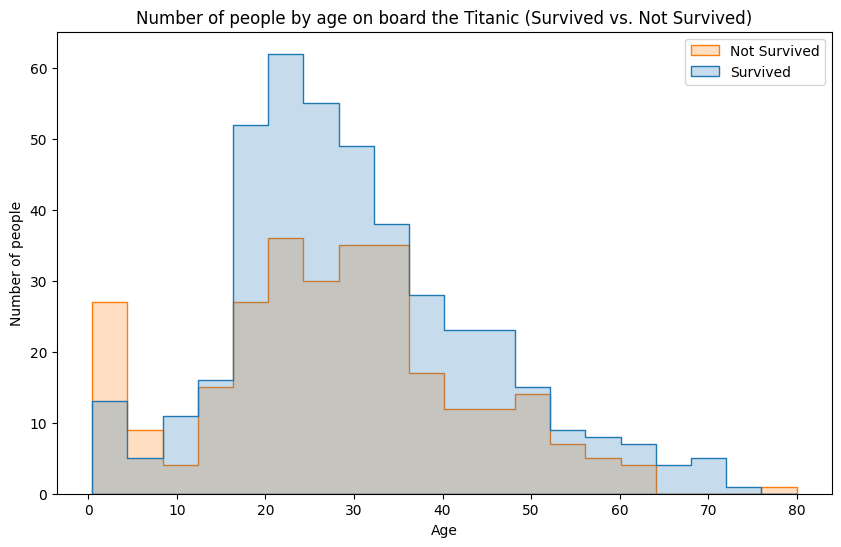

In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', bins=20, element='step', common_norm=False)
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Number of people by age on board the Titanic (Survived vs. Not Survived)')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

In [113]:
train_data = pd.get_dummies(train_data, columns=['Sex'])
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,True


In [114]:
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','SibSp', 'Parch', 'Embarked'], axis=1, inplace=True)
train_data.head(10)

,Survived,Pclass,Age,Fare,Sex_female,Sex_male
0,0,3,22.0,7.2500,False,True
1,1,1,38.0,71.2833,True,False
2,1,3,26.0,7.9250,True,False
3,1,1,35.0,53.1000,True,False
4,0,3,35.0,8.0500,False,True
6,0,1,54.0,51.8625,False,True
7,0,3,2.0,21.0750,False,True
8,1,3,27.0,11.1333,True,False
9,1,2,14.0,30.0708,True,False
10,1,3,4.0,16.7000,True,False


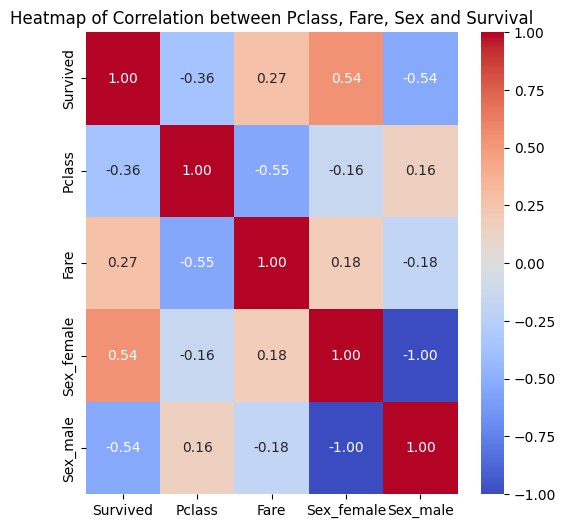

In [124]:
plt.figure(figsize=(6, 6))
corr_matrix = train_data[['Survived', 'Pclass', 'Fare', 'Sex_female', 'Sex_male']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation between Pclass, Fare, Sex and Survival')
plt.show()